# Fourieranalyse fuer Dummies
Eine schnelle Einfuehrung ohne viel Mathe.

Ich werde immer wieder gefragt, wie die FFT oder das Wasserfalldiagramm z.B. in diversen SDR Anwendungen zu interpretieren ist. Eventuell kann diese kleine Einfuehrung die Basis fuer ein zukuenftiges besseres Verstaendnis bilden.

Du findest hier keine mathematische Herleitung und auch keine mathematischen Grundlagen, wir verwenden keine Fachbegriffe. Aber wenn Du Dich dafuer interessierst, mache ich dazu auch gern einen Workshop :)

Legen wir los.


### Eine Hilfsfunktion und noetige Libs

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


# diese Funktion macht die FFT, normiert die Amplituden und plottet alles
def do_fft(x):
    fft_x = np.fft.fft(x)
    n = len(fft_x)
    freq = np.fft.fftfreq(n, 1/f_s)
    half_n = int(np.ceil(n/2.0))
    fft_x_half = (2.0 / n) * fft_x[:half_n]
    freq_half = freq[:half_n]
    plt.plot(freq_half, np.abs(fft_x_half))
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    return fft_x


* numpy ist ein Package fuer numerische Berechnungen in Python
* Mathplotlib ist ein Package fuer das Plotten mathematischer Funktionen
* do_fft macht die FFT fuer uns und plottet das Ergebnis


### Einstellungen fuer unseren virtuellen Sampler (A/D Wandler)

<Container object of 3 artists>

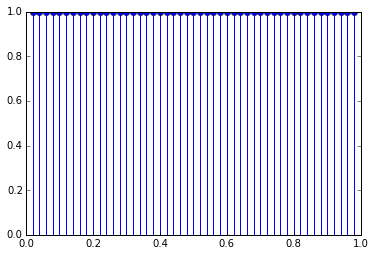

In [2]:
f_s = 50.0 # Samplefrequenz in Hz

time = np.arange(0.0, 3.0, 1/f_s) #Zeitachse

plt.stem(time[1:50],np.ones(50)[1:50]) #Sampelzeitpunkte plotten

* Wir sampeln 50 mal pro Sekunde
* time enthaelt jetzt 150 Werte (3 Sekunden mit je 50 Sampels)
* Man kann sagen, wir sampeln 3 Sekunden lang 50 Werte pro Sekunde.
* Das ergibt einen Abstand der einzelnen Sampels von 1/50 = 0.02 Sekunden

### Sampeln einer einfachen Sinusfunktion

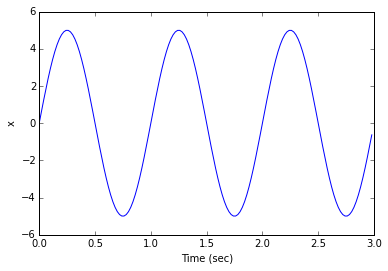

In [3]:
f = 1.0 # 1 Hz
x = 5 * np.sin(2 * np.pi * f * time) # Amplitude 5

plt.plot(time, x)
plt.xlabel("Time (sec)")
plt.ylabel("x")

* Wir erzeugen ein Sinussignal
* Samplefrequenz: 50 Hz, also 50 Samples pro Sekunde (50 S/s)
* Frequenz des Nutzsignals: 1 Hz (1 Schwingung pro Sekunde)

### Fourieranalyse des einfachen Sinussignals

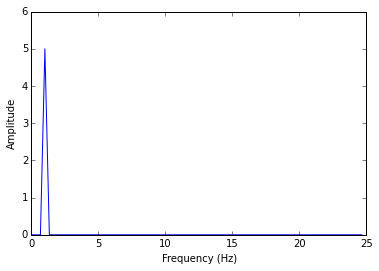

In [4]:
fft_x = do_fft(x)

* Wir transformieren das Sinussagen mittels der FFT in den Frequenzbereich
* Wir sehen einen Peak bei 1 Hz
* Der Peak hat eine Amplitude von 5

### Ueberlagerung des einfachen Sinussignals mit einem weiteren Sinussignal

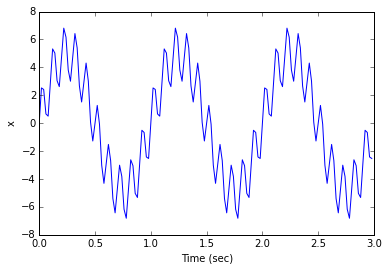

In [5]:
x = x + 2 * np.sin(10 * 2 * np.pi * f * time)

plt.plot(time, x)
plt.xlabel("Time (sec)")
plt.ylabel("x")

* Wir ueberlagern die Sinusfunktion mit einer weiteren Sinusfunkltion
* Wie gross ist deren Frequenz und Amplitude?

### Fourieranalyse des zusammengesetzten Sinussignals

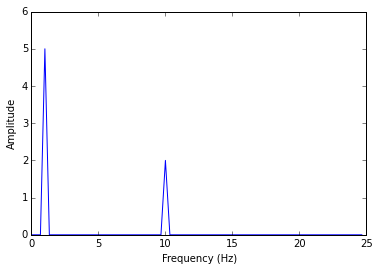

In [6]:
fft_x = do_fft(x)

* Im Zeitbereich werden beide Sinussignale und deren Amplituden sichtbar

### Ergebnis der Fourieranalyse ist ein Array aus komplexen Zahlen

In [7]:
print(fft_x[1:10])

[  1.81075131e-13 +4.34488036e-13j  -1.36950112e-13 +1.87898962e-13j
  -6.97946807e-13 -3.75000000e+02j   6.37510105e-14 -4.00537450e-14j
   1.49760213e-13 -5.44664175e-14j  -4.62418682e-14 +1.80390160e-13j
  -1.46838296e-13 -1.10553164e-13j   7.73182797e-14 +5.26975321e-14j
  -1.28442715e-13 -1.84592758e-13j]


* Die FFT erzeugt ein komplexes Frequenzspektrum
* Jede komplexe Zahl beschreibt einen Vektor mit einem bestimmten Winkel und einer bestimmten Laenge.
* Die Laenge des Vektors ist des Aequivalent zur Amplitude

### Betrag einer komplexen Zahl

In [8]:
print(abs(fft_x[1:40]))

[  4.70710162e-13   2.32510974e-13   3.75000000e+02   7.52894005e-14
   1.59357183e-13   1.86222770e-13   1.83802849e-13   9.35689386e-14
   2.24882230e-13   5.83961953e-14   3.74402492e-14   6.14323770e-14
   7.84797373e-14   6.79572427e-14   8.95349430e-14   5.51123704e-14
   1.51136116e-13   2.17599933e-14   1.94233924e-13   1.82566948e-13
   3.48429318e-14   5.19340890e-14   1.93480738e-13   2.54848369e-13
   1.97773486e-13   1.39906279e-13   1.88728665e-13   2.98342131e-14
   6.83976968e-14   1.50000000e+02   7.40284322e-14   1.26774874e-13
   2.95170482e-14   2.45881253e-13   2.21969618e-13   2.26781593e-13
   1.71230812e-13   6.04787774e-14   2.83279596e-14]


* abs() berechnet den Betrag (den Absolutwert) einer komplexen Zahl
* Der Betrag ener komplexen Zahlt entspricht der Laenge des von ihr dargestellten Vektors
* Die Frequenzaufloesung der FFT ist nur halb so gross wie unsere Sampelfrequenz
* Die Aufloesung betraegt daher nur 0.4 Hz anstatt 0.2 Hz
* Der 1 Hz Peak ist bei 3x0.4 Hz, der 10 Hz Peak ist bei 30x0.4 Hz
* Die Amplituden stimmen nicht mit den tatsaechlichen Amplituden ueberein, da sie noch nicht normalisiert wurden

### Das Frequenzspektrum eines reellen Eingangssignals ist symmetrisch

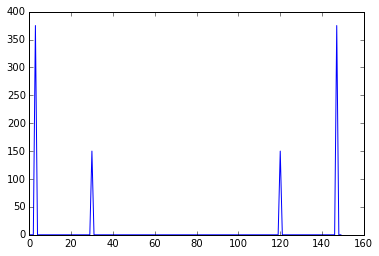

In [9]:
plt.plot(abs(fft_x))

* Eine Kleinigkeit haben wir noch verschwiegen und wollen sie hier erwaehnen
* Das von der FFT erzeuge Frequenzspektrum ist symmetrisch, wir haben bisher immer nur die Haelfte gesehen (75 von 150 Werten)
* Shannon!

### Die Umkehrfunktion der FFT (inverse FFT)

In [10]:
i_x = np.fft.ifft(fft_x)

* man kann die FFT auch umkehren

/usr/local/lib/python3.4/dist-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


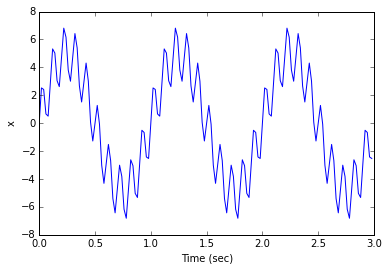

In [11]:
plt.plot(time,i_x)
plt.xlabel("Time (sec)")
plt.ylabel("x")

* die inverse FFT erzeugt aus dem (komplexen) Frequenzspektrum das Signal im Zeitbereich

### Filterung im Frequenzbereich und Ruecktransformierung in den Zeitbereich

In [12]:
fft_x[30] = 0
fft_x[-30] = 0

* Den 10 Hz Anteil haben wir im Frequenzspektrum jetzt auf 0 gesetzt
* Wie sieht das Signal jetzt im Zeitbereich aus?

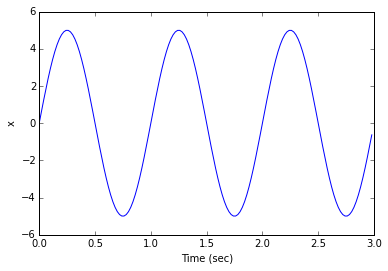

In [13]:
i_x = np.fft.ifft(fft_x)
plt.plot(time,i_x)
plt.xlabel("Time (sec)")
plt.ylabel("x")

* Wir haben das urspruengliche Signal mittels FFT in den Frequenzbereich transformiert
* Wir haben das Signal im Frequenzbereich gefiltert
* Wir haben das Signal mittels inverser FFT zurueck in den Zeitbereich transformiert

## Fourierreihen
* Jede nur erdenkliche Signalform kann aus einfachen Sinussignalen zusammengesetzt werden

### Saegezahnsignal (aus bekannter Fourierreihe)

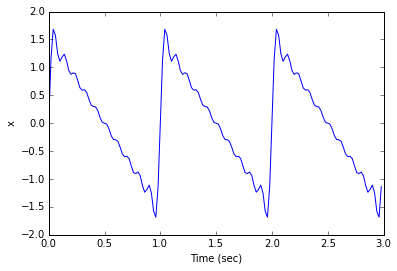

In [14]:
x = np.sin(2 * np.pi * f * time)  # Sinus 1 Hz, Amplitude 1
x = x + (1/2) * np.sin(2 * 2 * np.pi * f * time) # Sinus 2 Hz, Amplitude 0.5
x = x + (1/3) * np.sin(3 * 2 * np.pi * f * time) # ...
x = x + (1/4) * np.sin(4 * 2 * np.pi * f * time)
x = x + (1/5) * np.sin(5 * 2 * np.pi * f * time)
x = x + (1/6) * np.sin(6 * 2 * np.pi * f * time)
x = x + (1/7) * np.sin(7 * 2 * np.pi * f * time)
x = x + (1/8) * np.sin(8 * 2 * np.pi * f * time)
x = x + (1/9) * np.sin(9 * 2 * np.pi * f * time)
x = x + (1/10) * np.sin(10 * 2 * np.pi * f * time)
plt.plot(time,x)
plt.xlabel("Time (sec)")
plt.ylabel("x")

* Ein Saegezahnsignal, zusammengesetzt aus Sinussugnalen
* Fourierreihe eines Saegezahnsignals

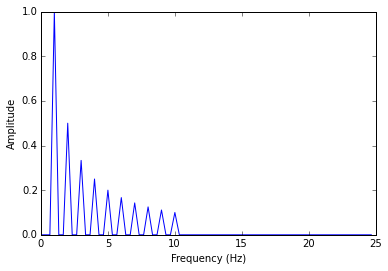

In [15]:
tmp = do_fft(x)

* Spektrum eines Saegezahnsignals

### Analytische Herleitung der Fourierreihe eines Rechtecksignals

(-1.2, 1.2)

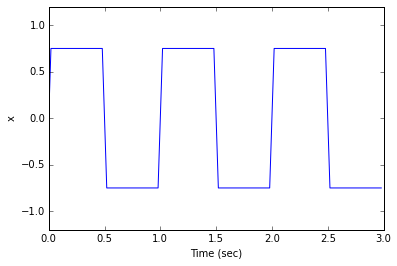

In [16]:
x[1:25] = 0.75
x[26:50] = -0.75
x[51:75] = 0.75
x[76:100] = -0.75
x[101:125] = 0.75
x[126:150] = -0.75
x[151:175] = 0.75
x[176:200] = -0.75
x[201:225] = 0.75
x[226:250] = -0.75
x[251:275] = 0.75
x[276:300] = -0.75

plt.plot(time,x)
plt.xlabel("Time (sec)")
plt.ylabel("x")
plt.ylim(-1.2,1.2)

* Rechtecksignal mit Frequenz 1 Hz
* Wie baut man das aus Sinus?
* Schauen wir uns mal das Spektrum an!

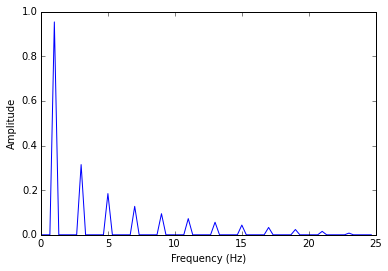

In [17]:
tmp = do_fft(x)

* Typischen Spektrum eines Rechtecksignales

### Herleitung Fourierreihe Rechtecksignal

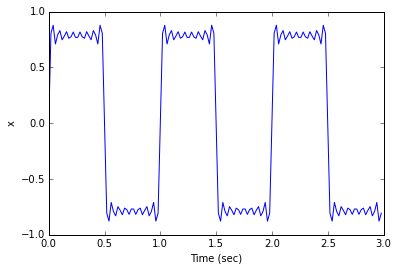

In [18]:
x = np.sin(1 * 2 * np.pi * f * time) # Sinus 1 Hz, Amplitude 1
x = x + (1/3) * np.sin(3 * 2 * np.pi * f * time) # Sinus 3 Hz, Amplitude 0.333
x = x + (1/5) * np.sin(5 * 2 * np.pi * f * time) # ...
x = x + (1/7) * np.sin(7 * 2 * np.pi * f * time)
x = x + (1/9) * np.sin(9 * 2 * np.pi * f * time)
x = x + (1/11) * np.sin(11 * 2 * np.pi * f * time)
x = x + (1/13) * np.sin(13 * 2 * np.pi * f * time)
x = x + (1/15) * np.sin(15 * 2 * np.pi * f * time)
plt.plot(time,x)
plt.xlabel("Time (sec)")
plt.ylabel("x")